# Setup and Installs

In [2]:
## Setup
!pip install colour
!pip install matplotlib
!pip install pandas
!pip install utm

import math
import matplotlib.pyplot as plt
import matplotlib_inline
import numpy as np
import pandas as pd
import utm
from itertools import product
from collections import defaultdict
import io
import pandas as pd
import pickle
import matplotlib.patches as patches

  Using cached colour-0.1.5-py2.py3-none-any.whl.metadata (18 kB)
Using cached colour-0.1.5-py2.py3-none-any.whl (23 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 12.8 MB/s  0:00:00 eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 14.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [matplotlib]5 [matplotlib]
  Using cached utm-0.8.1-py3-none-any.whl.metadata (5.2 kB)
Using cached utm-0.8.1-py3-none-any.whl (8.6 kB)


# Data Analysis

In [35]:
aircraft = "Cessna_172S_flight_"
dfArray = []
for x in range(1,100):
    new_df = pd.read_csv(f'../../Project_Data/Empirical_Data/GATS_Dataset/{aircraft}{x}.csv')
    dfArray.append(new_df)

# df = pd.read_csv(f'../../Project_Data/Empirical_Data/GATS_Dataset/{aircraft}1.csv')
# df2 = pd.read_csv(f'../../Project_Data/Empirical_Data/GATS_Dataset/{aircraft}2574.csv')
dfArray[0].head()

,AltAGL,AltB,AltGPS,AltMSL,AltMSL Lag Diff,amp1,amp2,AOASimple,BaroA,CAS,...,TRK,True Airspeed(ft/min),volt1,volt2,VPLwas,VSpd,VSpd Calculated,VSpdG,WndDr,WndSpd
0,3.0,854.5,751.9,839.7,0.0,6.9,0.6,NaN,30.13,20.667,...,266.5,2135.661461,28.1,28.1,NaN,14.41,NaN,0.0,NaN,NaN
1,3.0,854.5,751.9,839.7,0.0,6.9,0.6,0.85,30.13,20.667,...,266.5,2135.661461,28.1,28.1,NaN,14.41,0.0,0.0,NaN,NaN
2,3.0,854.5,752.0,839.8,0.0,6.8,0.6,0.87,30.13,20.667,...,266.5,2135.661461,28.0,28.1,NaN,24.62,0.0,0.0,NaN,NaN
3,3.0,854.5,752.1,839.9,0.0,6.6,0.5,0.82,30.13,20.667,...,266.5,2135.661461,28.0,28.1,NaN,15.89,0.0,0.0,NaN,NaN
4,3.0,854.5,752.0,839.8,0.0,6.7,0.5,0.83,30.13,20.667,...,266.5,2135.661461,28.1,28.1,NaN,1.16,0.0,0.0,NaN,NaN


In [36]:
maxAlt = max(df['AltAGL'])
minAlt = min(df['AltAGL'])
avgAlt = sum(df['AltAGL'])/len(df['AltAGL'])
length = len(df['AltAGL'])
(maxAlt,minAlt,avgAlt,length)

(2870.0, 0.0, 947.4664662349676, 4324)

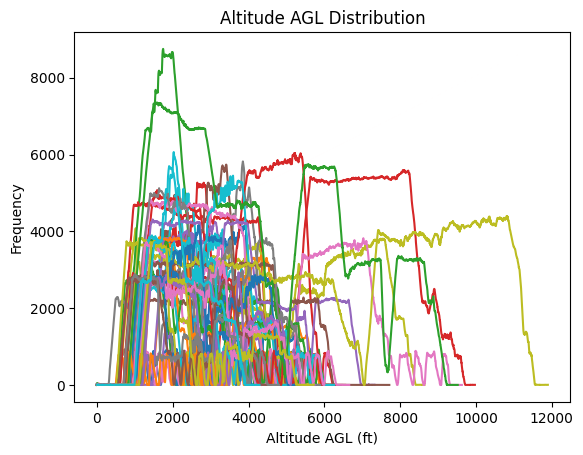

In [39]:
graph1 = dfArray[0]['AltAGL'].plot(kind='line', title='Altitude AGL Distribution')
plt.xlabel('Altitude AGL (ft)')
plt.ylabel('Frequency')

for x in range (1,50):
    dfArray[x]['AltAGL'].plot(ax=graph1, kind='line')
# df2['AltAGL'].plot(ax=graph1, kind='line')
plt.show()


Isolation Criteria:

Certain Delta change in a certain X window
Must be a negative delta change
Maybe if it's a descent from 1000 AGl to 0 AGL a net delta of -1500 Feet to account for any climbs or level offs within the descent profile.

Pseudo Code:
while X2 < dataframe.length() 
If in X1=0 to X2= 100 there is Delta of -1500, then isolate
Else, X1 + 100, X2 + 100

Found Descent in flight 1: From 1002.0 ft AGL to 0.0 ft AGL over 364 data points.
Found Descent in flight 2: From 1013.0 ft AGL to 0.0 ft AGL over 336 data points.
Found Descent in flight 2: From 1013.0 ft AGL to 0.0 ft AGL over 504 data points.
Found Descent in flight 4: From 1007.0 ft AGL to 0.0 ft AGL over 358 data points.
Found Descent in flight 4: From 1007.0 ft AGL to 0.0 ft AGL over 537 data points.
Found Descent in flight 6: From 1018.0 ft AGL to 0.0 ft AGL over 276 data points.
Found Descent in flight 6: From 1010.0 ft AGL to 0.0 ft AGL over 355 data points.
Found Descent in flight 6: From 1018.0 ft AGL to 0.0 ft AGL over 414 data points.
Found Descent in flight 7: From 1014.0 ft AGL to 0.0 ft AGL over 252 data points.
Found Descent in flight 7: From 1014.0 ft AGL to 0.0 ft AGL over 294 data points.
Found Descent in flight 7: From 1007.0 ft AGL to 0.0 ft AGL over 331 data points.
Found Descent in flight 7: From 1008.0 ft AGL to 0.0 ft AGL over 353 data points.
Found Descent in

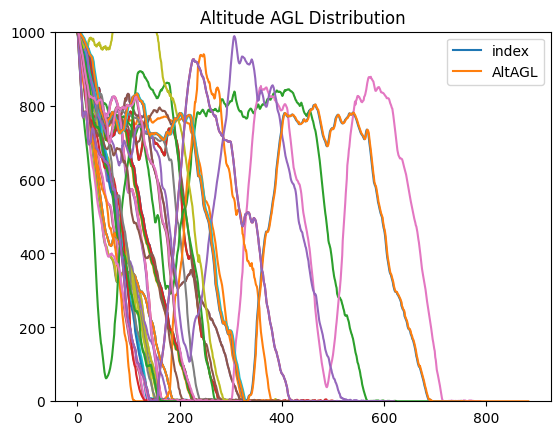

In [ ]:
# def spliceDataFrame(x1,x2,data):

descentArray = []


for x in range (1,5):
    currdf = dfArray[x]
    # x1 = 0
    # x2 = 50

    for stepCount in range(50,1000):
        step = stepCount
        altitudeDeltaThreshold = 800

        for xInner in range(0, currdf.__len__()-step, step):
            storageCount = 0
            x1 = xInner
            x2 = xInner+step
            delta = currdf['AltAGL'][x1] - currdf['AltAGL'][x2]
            if delta >= altitudeDeltaThreshold and currdf['AltAGL'][x2] <= 0 and currdf['AltAGL'][x1] > 0.0:
                # print(f"Found Descent in flight {x}: From {currdf['AltAGL'][x1]} ft AGL to {currdf['AltAGL'][x2]} ft AGL over {x2-x1} data points.")
                if(currdf['AltAGL'][x1] <= 1020 and currdf['AltAGL'][x1] >=1000):
                    print(f"Found Descent in flight {x}: From {currdf['AltAGL'][x1]} ft AGL to {currdf['AltAGL'][x2]} ft AGL over {x2-x1} data points.")
                    newDataFrame = pd.DataFrame(currdf['AltAGL'][x1:x2],columns=['AltAGL']).reset_index()
                    descentArray.append(newDataFrame)
                    storageCount+=1

        
        # descentArray[0].head()
        # x1 = xInner
        # x2 = xInner+step

# descentArray.__len__()
axes = descentArray[0].plot(kind='line', title='Altitude AGL Distribution')
for x in range(1,descentArray.__len__()):
    descentArray[x]['AltAGL'].plot(ax=axes, kind='line')

axes.set_ylim(0,1000)
plt.show()

    

